

Задача:

Этот набор данных содержит опрос удовлетворенности авиапассажиров. Какие факторы сильно коррелируют с удовлетворенным (или неудовлетворенным) пассажиром? Возможно предсказать удовлетворенность пассажиров?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/1DJ1kQYe2JID9iXWBo2nlIRYASS34Ge6E/view?usp=share_link"

id = link.split("/")[-2]

downloaded = drive.CreateFile({"id":id})
downloaded.GetContentFile("train.csv")

df = pd.read_csv("train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


*   **Gender**: Gender of the passengers (Female, Male) - Пол пассажиров (женщина, мужчина)

*   **Customer** Type: The customer type (Loyal customer, disloyal customer) - Тип клиента (постоянный клиент, нелояльный клиент).

*   **Age**: The actual age of the passengers - Фактический возраст пассажиров

*   **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel) - Цель полета пассажиров (Личная поездка, Деловая поездка)

*   **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus) - Туристический класс в самолете пассажиров (Бизнес, Эко, Эко Плюс)

*   **Flight distance**: The flight distance of this journey - Расстояние полета этого путешествия

*   **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) - Уровень удовлетворенности услугой Wi-Fi на борту (0: не применимо; 1–5)

*   **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient - Уровень удовлетворенности удобным временем отправления/прибытия

*   **Ease of Online booking**: Satisfaction level of online booking - Уровень удовлетворенности онлайн-бронированием

*   **Gate location**: Satisfaction level of Gate location - Уровень удовлетворенности расположением входа на посадку

*   **Food and drink**: Satisfaction level of Food and drink - Уровень удовлетворенности едой и напитками

*   **Online boarding**: Satisfaction level of online boarding - Уровень удовлетворенности онлайн-интернатом

*   **Seat comfort**: Satisfaction level of Seat comfort - Удовлетворительный уровень комфорта сиденья

*   **Inflight entertainment**: Satisfaction level of inflight entertainment - Уровень удовлетворенности развлечениями на борту

*   **On-board service**: Satisfaction level of On-board service - Уровень удовлетворенности обслуживанием на борту

*   **Leg room service**: Satisfaction level of Leg room service - Уровень удовлетворенности обслуживанием в номере для ног

*   **Baggage handling**: Satisfaction level of baggage handling - Уровень удовлетворенности обработкой багажа

*   **Check-in service**: Satisfaction level of Check-in service - Уровень удовлетворенности услугой регистрации

*   **Inflight service**: Satisfaction level of inflight service - Уровень удовлетворенности обслуживанием на борту

*   **Cleanliness**: Satisfaction level of Cleanliness - Удовлетворительный уровень чистоты

*   **Departure Delay in Minutes**: Minutes delayed when departure - Задержки при отправлении в минутах

*   **Arrival Delay in Minutes**: Minutes delayed when Arrival - Задержки при прибытии в минутах

*   **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) - Уровень удовлетворенности от авиакомпании (удовлетворенность, нейтральность или неудовлетворенность)


Избавимся от столбца 'id', так как его значени не влияют на классы

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.dtypes

Unnamed: 0                             int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Найдем количество элементов в каждом классе

In [ ]:
count1 = 0
count2 = 0
for i in range(len(df['satisfaction'])):
  if df['satisfaction'][i] == 'satisfied':
    count1 += 1
  elif df['satisfaction'][i] == 'neutral or dissatisfied':
    count2 += 1
print('Число satisfied: ',count1)
print('Число neutral or dissatisfied: ',count2)

Число satisfied:  45025
Число neutral or dissatisfied:  58879


Поиск и обработка пустых пропущенных значений

In [ ]:
df.isnull().sum()

Unnamed: 0                             0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

---
**Анализ данных**


In [ ]:
df.describe()

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,29997.914016,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


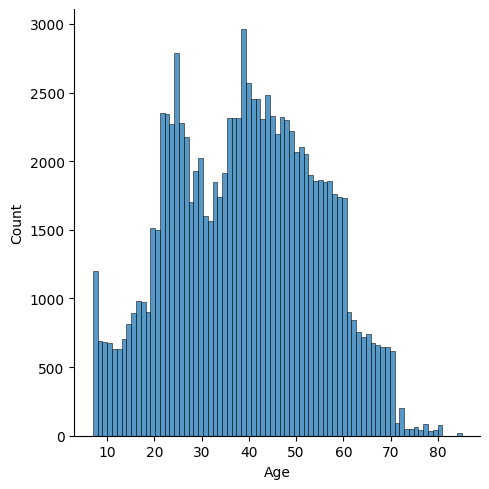

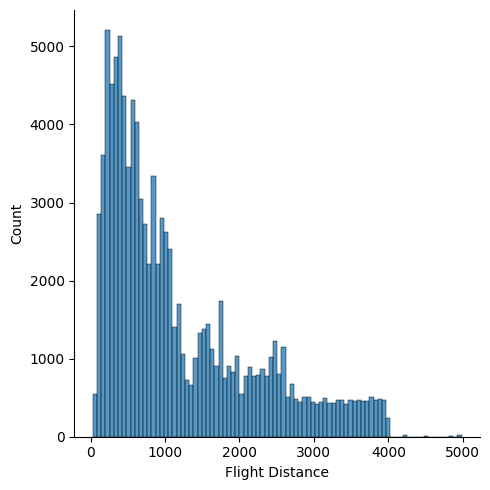

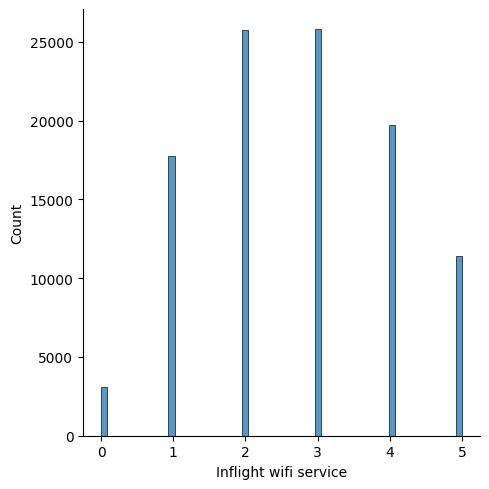

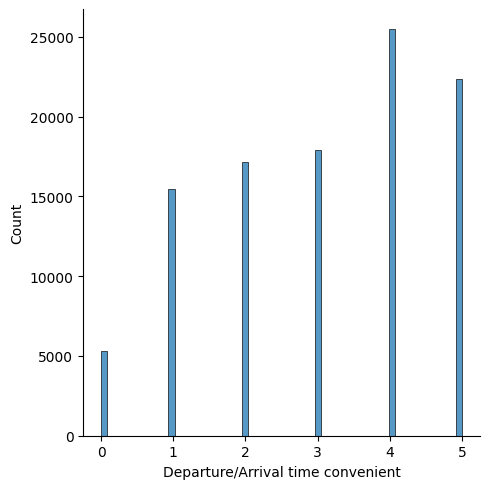

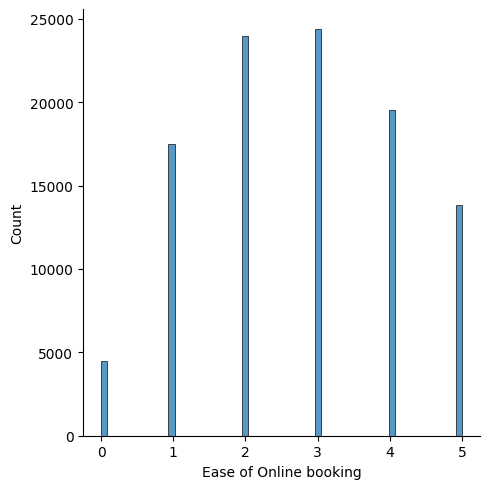

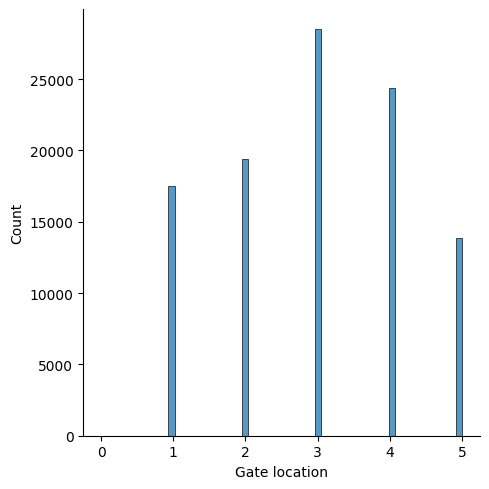

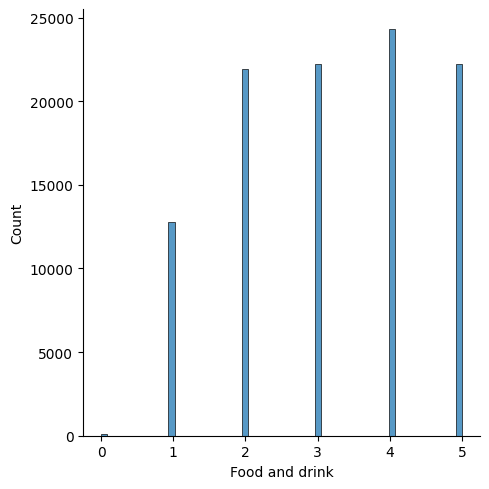

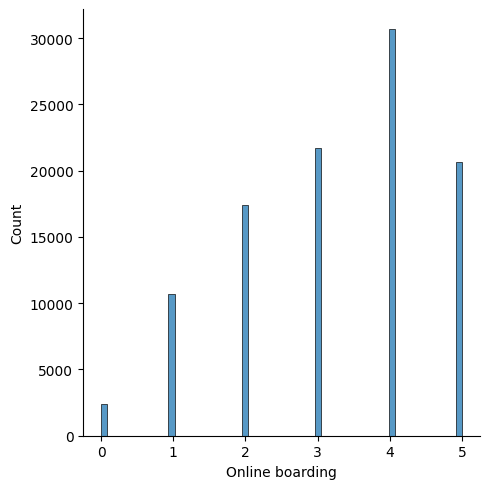

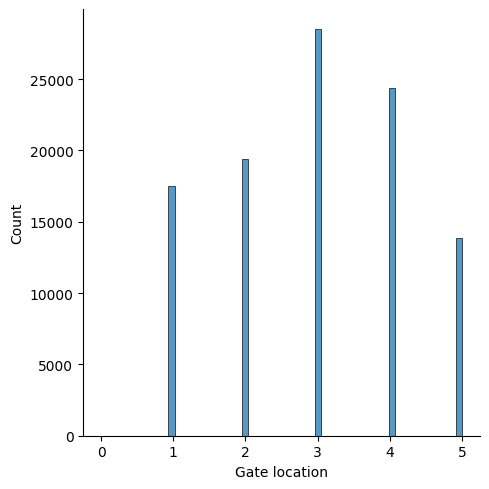

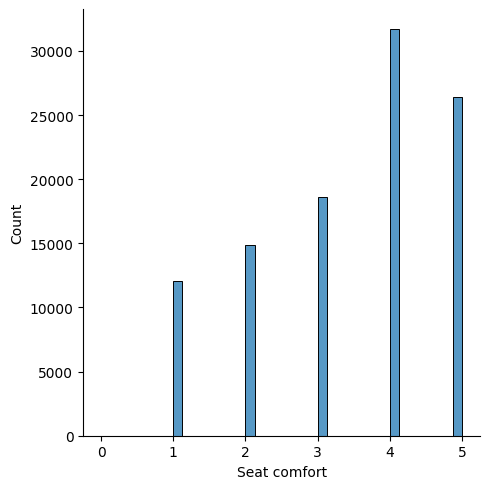

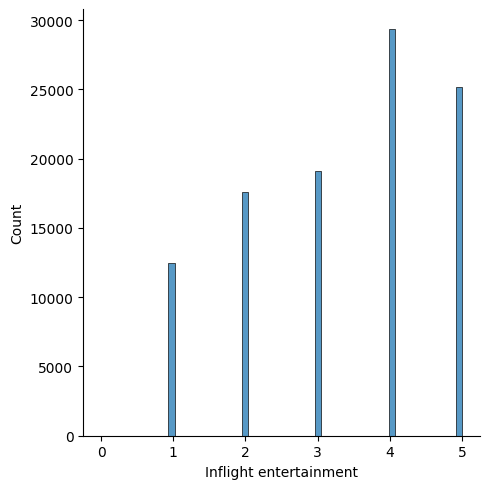

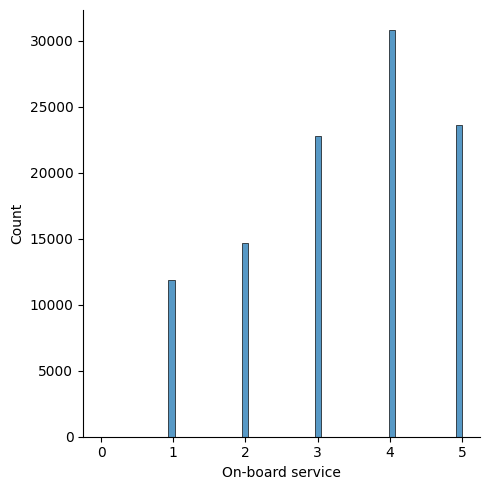

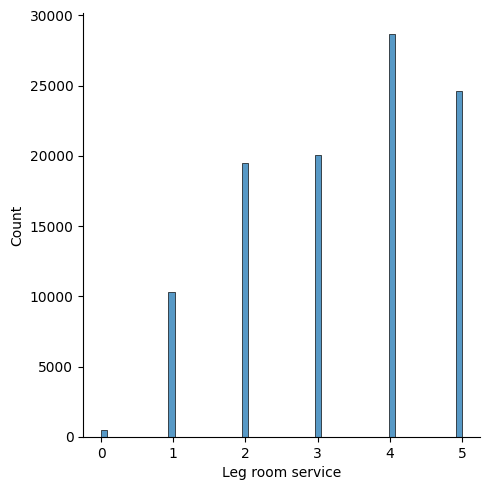

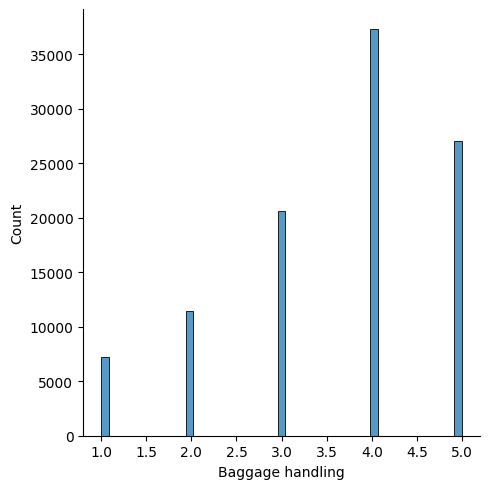

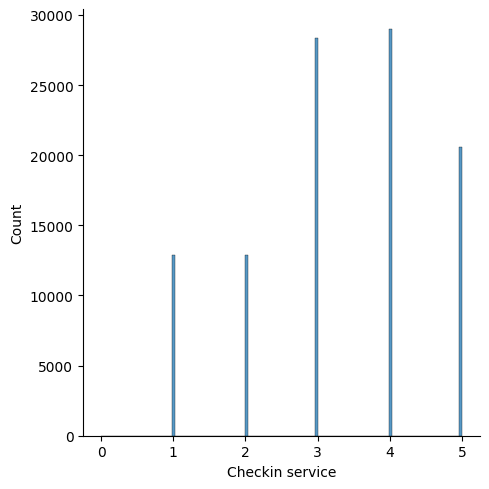

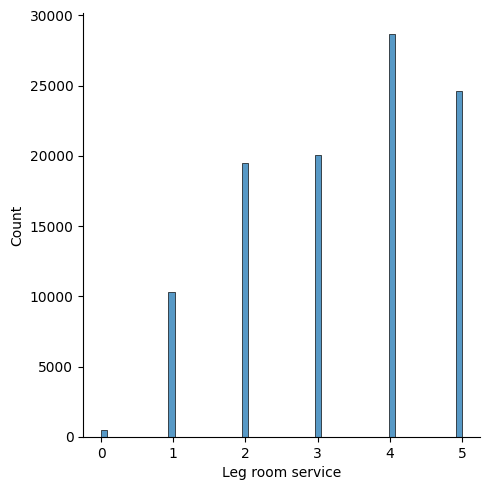

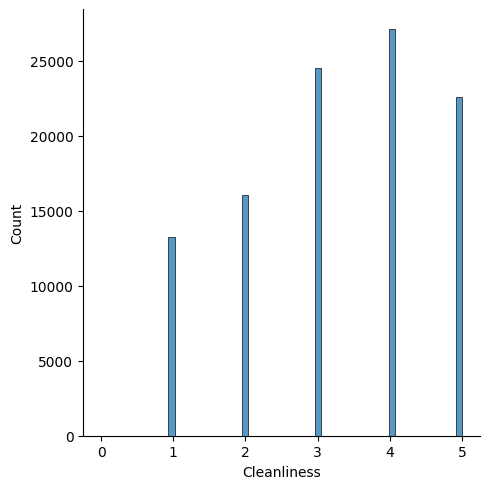

In [ ]:
ind = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Gate location',
       'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Leg room service', 'Cleanliness']
for i in range(len(ind)):
  sns.displot(df[ind[i]])
  plt.show()

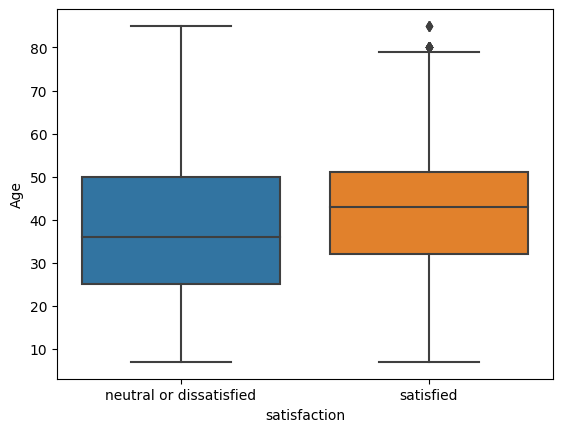

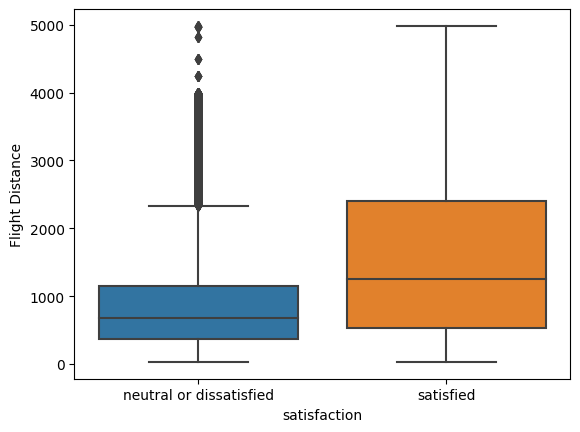

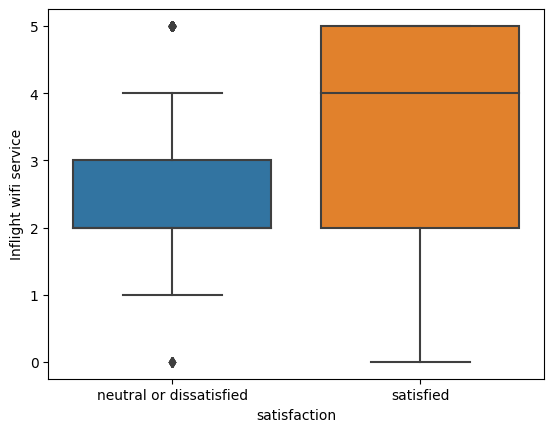

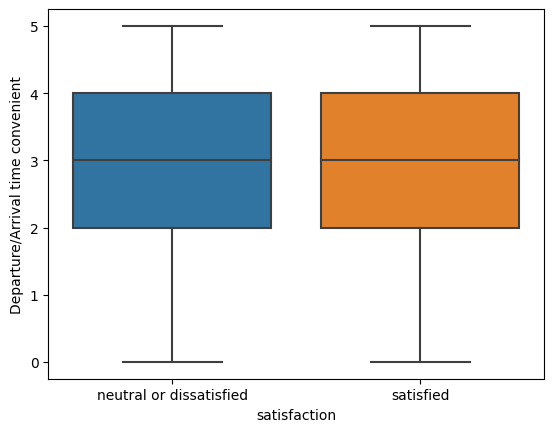

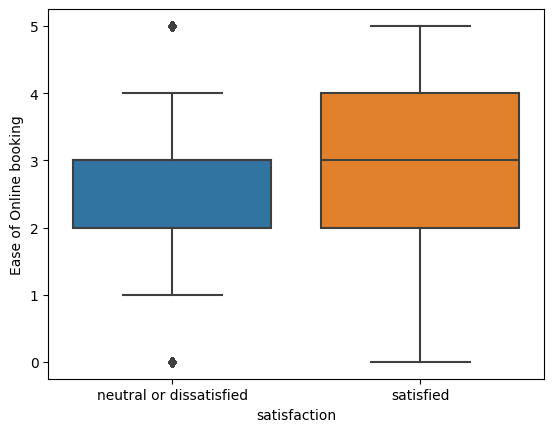

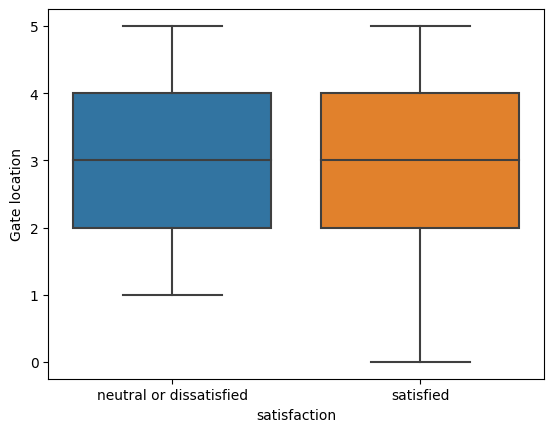

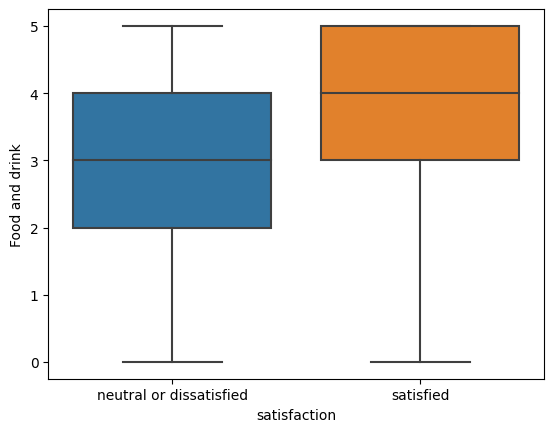

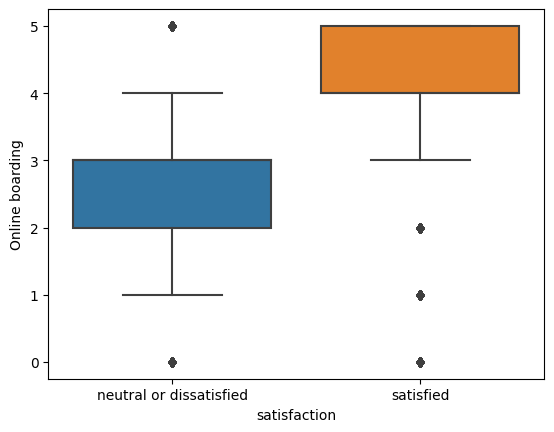

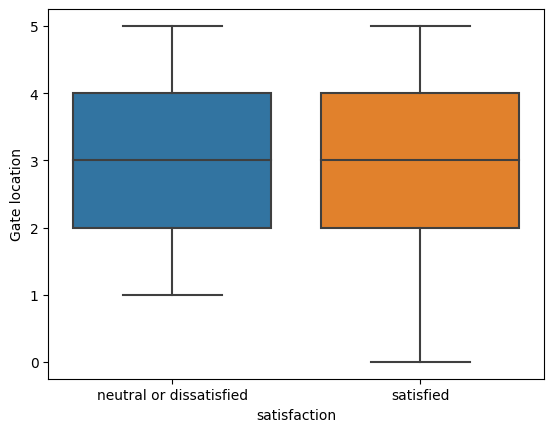

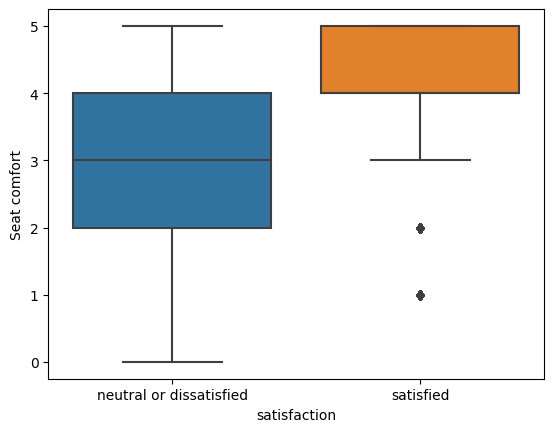

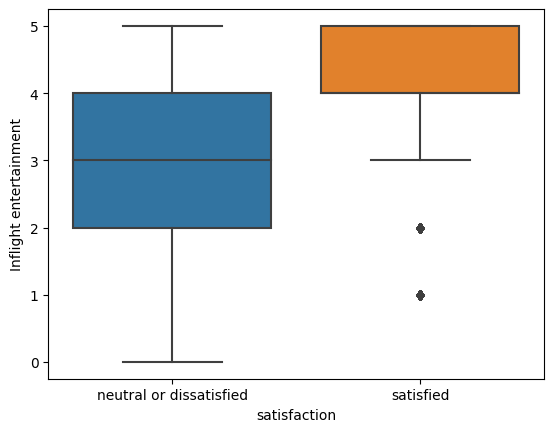

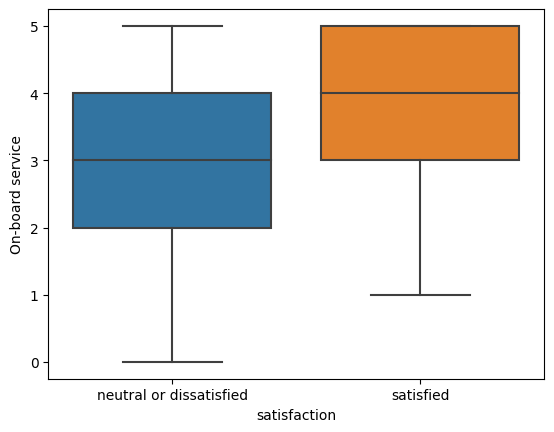

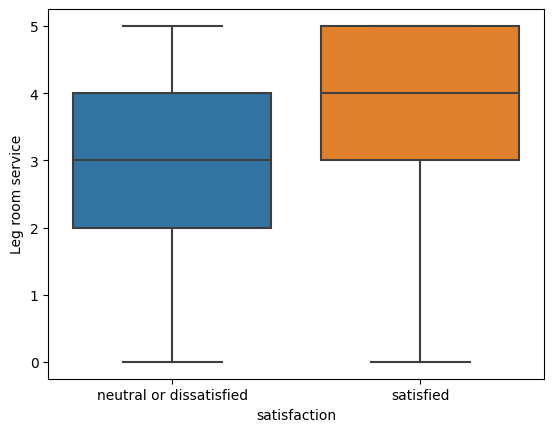

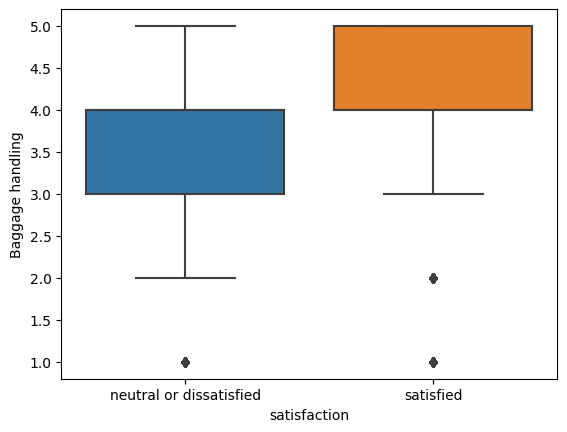

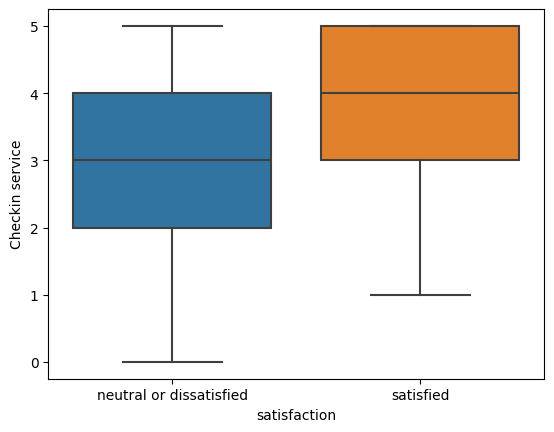

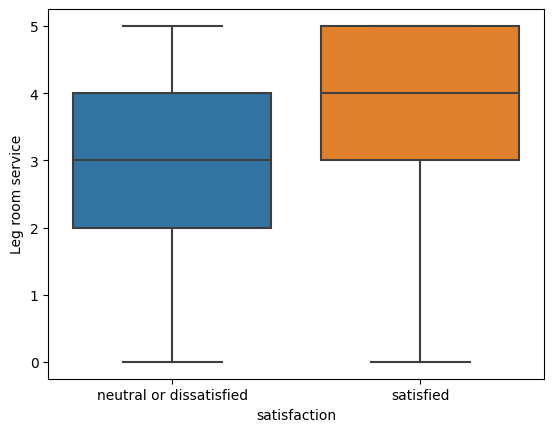

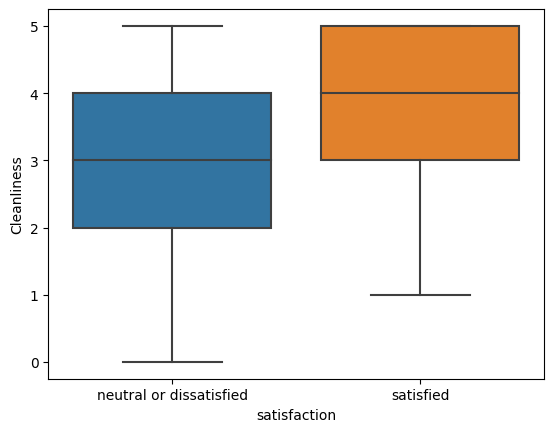

In [ ]:
for i in range(len(ind)):
  sns.boxplot(x="satisfaction", y=ind[i], data=df)
  plt.show()

<ipython-input-17-3c6b85975c96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,vmax=1)


<Axes: >

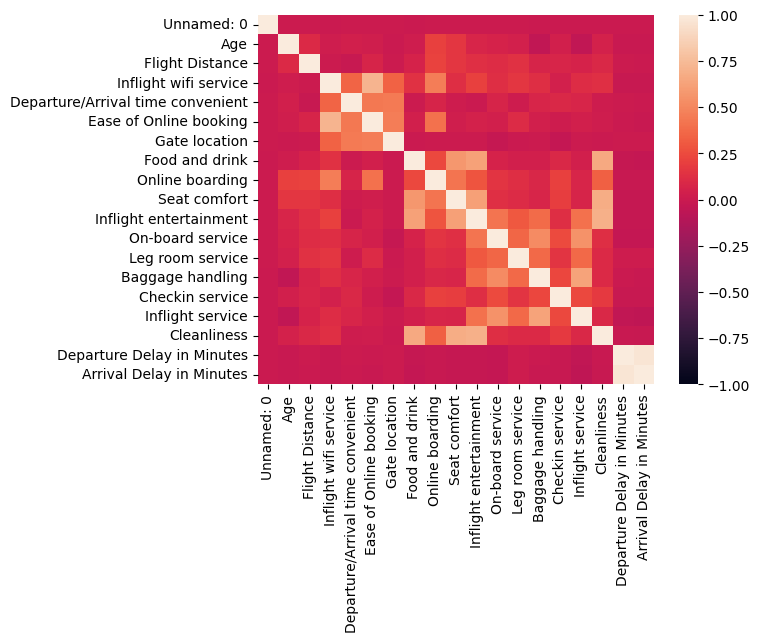

In [ ]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)